### **Estimación de precios de casas utilizando regresión lineal**

Se utiliza un dataset con diversas características de casas. A partir de estos datos se busca predecir el precio de venta de las casas aplicando un modelo de machine learning.

El dataset se encuentra disponible en Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

### **1. Importación de librerias y dataset**

Se importan las librerias a ser utilizadas y el dataset a analizar

In [426]:
# librerias 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [427]:
# importar el dataset de train
df = pd.read_csv('train.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal


In [428]:
# importar el dataset de test
df_test = pd.read_csv('test.csv')
df_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
Id,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470
MSSubClass,20,20,60,60,120,60,20,60,20,20
MSZoning,RH,RL,RL,RL,RL,RL,RL,RL,RL,RL
LotFrontage,80.0,81.0,74.0,78.0,43.0,75.0,NaN,63.0,85.0,70.0
LotArea,11622,14267,13830,9978,5005,10000,7980,8402,10176,8400
...,...,...,...,...,...,...,...,...,...,...
MiscVal,0,12500,0,0,0,0,500,0,0,0
MoSold,6,6,3,6,1,4,3,5,2,4
YrSold,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD


### **2. Limpieza de datos**

En esta sección se verifica la presencia de valores duplicados, outliers, nulos en el dataset con los datos de entrenamiento

### **2.1. Verificacion de tipo de datos**

In [429]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [430]:
# info del df
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [431]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)
print(df_test.dtypes)

Los tipos de datos del dataframe son:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


Se extraen todas las columnas del tipo "object" para verificar los valores unicos de cada columna.

In [432]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Columna 'Street': ['Pave' 'Grvl']
Columna 'Alley': [nan 'Grvl' 'Pave']
Columna 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Columna 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Columna 'Utilities': ['AllPub' 'NoSeWa']
Columna 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Columna 'LandSlope': ['Gtl' 'Mod' 'Sev']
Columna 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Columna 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Columna 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Columna 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Columna 'HouseStyle': ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Columna 'RoofStyle': ['Gable' 'Hip' 

En cada columna que fue identificada como "object" no se observa que hayan entre ellos simbolos como ?, $.

A continuacion se verifica si las columnas no se encuentran vacias.

In [433]:
# verificar celdas nulas o con espacios 
empty_columns = object_columns.apply(lambda col: col.isna().all() or col.str.strip().eq('').all())

# resultado
print("Columnas de tipo object vacías:")
print(empty_columns[empty_columns].index.tolist())

Columnas de tipo object vacías:
[]


No se encuentran columnas que esten vacias.

Entonces se procede a realizar el cambio de las columnas object al tipo string

In [434]:
# objeto a category
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

# resultado
df.dtypes

Id                        int64
MSSubClass                int64
MSZoning         string[python]
LotFrontage             float64
LotArea                   int64
                      ...      
MoSold                    int64
YrSold                    int64
SaleType         string[python]
SaleCondition    string[python]
SalePrice                 int64
Length: 81, dtype: object

A modo de verificacion, se analizan los valores unicos de las columnas con formato int64 y float64 para verificar que hayan sido identificadas de manera correcta.

In [435]:
# extraer las columnas tipo int
numerical_columns = df.select_dtypes(include=['int64','float64'])

# identificar sus valores unicos 
for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'Id': [   1    2    3 ... 1458 1459 1460]
Columna 'MSSubClass': [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Columna 'LotFrontage': [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Columna 'LotArea': [ 8450  9600 11250 ... 17217 13175  9717]
Columna 'OverallQual': [ 7  6  8  5  9  4 10  3  1  2]
Columna 'OverallCond': [5 8 6 7 4 2 3 9 1]
Columna 'YearBuilt': [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 19

Todos los datos del tipo numerico fueron identificados correctamente. 

### **2.2. Verificacion de valores duplicados**

Se procede a verificar si hay datos duplicados.



In [436]:
# identificar duplicados
duplicados = df.duplicated()

# contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


Tampoco el dataset de entrenamiento contiene datos duplicados.


### **2.3. Consistencia de variables categoricas**

Se verifica entonces la consistencia de las variables categoricas, que la mismas palabras no se encuentren con diferentes formatos y por lo tanto se decide normalizar a minusculas. La siguiente porción de código fue elaborado con chat gpt para borrar espacios entre palabras y convertir todos a minusculas.

In [438]:
# función para corregir inconsistencias
def clean_categorical_column(column):
    if column.isna().all():
        # no se hace nada si toda la columna es NA
        return column  
    # limpiar espacios, y normalizar a minúsculas
    cleaned_column = column.str.strip().str.lower()
    return cleaned_column

# aplicar la funcion al df
for col in df.select_dtypes(include='string').columns:
    df[col] = clean_categorical_column(df[col])

# resultado
print("DataFrame:")
print(df)

DataFrame:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       rl         65.0     8450   pave  <NA>      reg   
1        2          20       rl         80.0     9600   pave  <NA>      reg   
2        3          60       rl         68.0    11250   pave  <NA>      ir1   
3        4          70       rl         60.0     9550   pave  <NA>      ir1   
4        5          60       rl         84.0    14260   pave  <NA>      ir1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       rl         62.0     7917   pave  <NA>      reg   
1456  1457          20       rl         85.0    13175   pave  <NA>      reg   
1457  1458          70       rl         66.0     9042   pave  <NA>      reg   
1458  1459          20       rl         68.0     9717   pave  <NA>      reg   
1459  1460          20       rl         75.0     9937   pave  <NA>      reg   

     LandContour Utilities  ... PoolArea

In [439]:
# df
df.dtypes

Id                        int64
MSSubClass                int64
MSZoning         string[python]
LotFrontage             float64
LotArea                   int64
                      ...      
MoSold                    int64
YrSold                    int64
SaleType         string[python]
SaleCondition    string[python]
SalePrice                 int64
Length: 81, dtype: object

### **2.4. Análisis de los valores faltantes**

Se verifica la cantidad y porcentaje de valores faltantes en el dataframe, además de ser necesario se rellenan los datos faltantes.

In [441]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# filtrar solo los que tienen NA
na = na[na['Na en q'] > 0]

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
FireplaceQu,770,690,47.26
LotFrontage,1201,259,17.74
GarageType,1379,81,5.55
GarageYrBlt,1379,81,5.55
GarageFinish,1379,81,5.55


Uno de los datos faltantes con mayor cantidad es PoolQC, que es la calidad de las piscinas de las casas, con los posibles valores:         
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
NA	No Pool
El 99% de los datos no contiene esta informacion.

In [442]:
df.loc[df.isnull()['PoolQC']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,<NA>,ir1,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,<NA>,ir1,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,<NA>,ir1,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,<NA>,reg,lvl,allpub,...,0,<NA>,mnprv,<NA>,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,<NA>,reg,lvl,allpub,...,0,<NA>,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,4,2010,wd,normal,142125


Verificar si las columnas de PoolQC son nulas y las columnas de PoolArea son 0, esto podria implicar que las casas no tienen piscina.

In [443]:
# pool area 0
df.loc[df['PoolArea']==0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,<NA>,ir1,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,<NA>,ir1,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,<NA>,ir1,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,<NA>,reg,lvl,allpub,...,0,<NA>,mnprv,<NA>,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,<NA>,reg,lvl,allpub,...,0,<NA>,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,<NA>,reg,lvl,allpub,...,0,<NA>,<NA>,<NA>,0,4,2010,wd,normal,142125


In [444]:
# pool area no 0
df.loc[df['PoolArea']!=0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,rl,174.0,25419,pave,<NA>,reg,lvl,allpub,...,512,ex,gdprv,<NA>,0,3,2006,wd,abnorml,235000
810,811,20,rl,78.0,10140,pave,<NA>,reg,lvl,allpub,...,648,fa,gdprv,<NA>,0,1,2006,wd,normal,181000
1170,1171,80,rl,76.0,9880,pave,<NA>,reg,lvl,allpub,...,576,gd,gdprv,<NA>,0,7,2008,wd,normal,171000
1182,1183,60,rl,160.0,15623,pave,<NA>,ir1,lvl,allpub,...,555,ex,mnprv,<NA>,0,7,2007,wd,abnorml,745000
1298,1299,60,rl,313.0,63887,pave,<NA>,ir3,bnk,allpub,...,480,gd,<NA>,<NA>,0,1,2008,new,partial,160000
1386,1387,60,rl,80.0,16692,pave,<NA>,ir1,lvl,allpub,...,519,fa,mnprv,tenc,2000,7,2006,wd,normal,250000
1423,1424,80,rl,NaN,19690,pave,<NA>,ir1,lvl,allpub,...,738,gd,gdprv,<NA>,0,8,2006,wd,alloca,274970


Se rellenan los datos faltantes de PoolQC con No Pool, ya que coincidentemente, tampoco cuenta con los datos de pool area y esto implicaria que la casa no cuenta con piscina.

In [445]:
# rellenar
df.loc[(df['PoolArea'] == 0) & (df['PoolQC'].isnull()), 'PoolQC'] = 'No Pool'

df.loc[df.isnull()['PoolQC']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [446]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# filtrar solo los que tienen NA
na = na[na['Na en q'] > 0]

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
FireplaceQu,770,690,47.26
LotFrontage,1201,259,17.74
GarageType,1379,81,5.55
GarageYrBlt,1379,81,5.55
GarageFinish,1379,81,5.55
GarageQual,1379,81,5.55


Otra columna con gran cantidad de datos faltantes es MiscFeature, que se refiere a caracteristicas extras que tiene la casa y tiene valores como: 
MiscFeature: Miscellaneous feature not covered in other categories
Elev	Elevator
Gar2	2nd Garage (if not described in garage section)
Othr	Other
Shed	Shed (over 100 SF)
TenC	Tennis Court
NA	None

In [447]:
df.loc[df.isnull()['MiscFeature']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,fv,62.0,7500,pave,pave,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,10,2009,wd,normal,185000
1455,1456,60,rl,62.0,7917,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,<NA>,reg,lvl,allpub,...,0,No Pool,mnprv,<NA>,0,2,2010,wd,normal,210000
1458,1459,20,rl,68.0,9717,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,4,2010,wd,normal,142125


Para tomar la decision de si se elimina o mantiene los datos de esta columna, se busca a continuacion identificar si hay alguna relacion con el precio de venta de las casas. Asi, se convierte la variable miscfeature a una binaria, tomando el valor de 1 cuando la casa cuenta con estas caracteristicas extras y 0 cuando no las tiene. Luego, se verifica la correlacion con el precio de venta.

In [448]:
# convertir MiscFeature en variable binaria
df_corr = df[['MiscFeature', 'SalePrice']].copy()
df_corr['HasMiscFeature'] = df_corr['MiscFeature'].notna().astype(int)

# correlacion entre presencia o ausencia de features con precio
correlation = df_corr['HasMiscFeature'].corr(df_corr['SalePrice'])
print(f"Correlación entre 'HasMiscFeature' y el precio: {correlation}")

Correlación entre 'HasMiscFeature' y el precio: -0.07229811288612352


Como la correlacion entre misc features y el precio de las casas es muy debil, no se rellenara pero tampoco sera utilizado en el test.

La siguiente columna a analizar es la de Alley, que representa el tipo de entrada a la casa, tomando los siguientes valores 
Grvl	Gravel
Pave	Paved
NA 	No alley access

El 93% de la columna no contiene datos.

In [449]:
df.loc[df.isnull()['Alley']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,<NA>,reg,lvl,allpub,...,0,No Pool,mnprv,<NA>,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,<NA>,reg,lvl,allpub,...,0,No Pool,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,4,2010,wd,normal,142125


Nuevamente, buscaremos una correlacion entre alley y el precio de venta de las casas.

In [450]:
# convertir MiscFeature en variable binaria
df_corr = df[['Alley', 'SalePrice']].copy()
df_corr['HasAlley'] = df_corr['Alley'].notna().astype(int)

# correlacion entre presencia o ausencia de features con precio
correlation = df_corr['HasAlley'].corr(df_corr['SalePrice'])
print(f"Correlación entre 'HasAlley' y el precio: {correlation}")

Correlación entre 'HasAlley' y el precio: -0.12361124617957109


La correlacion es muy debil y por tanto este dato tambien sera ignorado.

El mismo procedimiento sera aplicado a la columna fence.

In [451]:
df.loc[df.isnull()['Fence']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,rl,90.0,17217,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,7,2006,wd,abnorml,84500
1454,1455,20,fv,62.0,7500,pave,pave,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,10,2009,wd,normal,185000
1455,1456,60,rl,62.0,7917,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,8,2007,wd,normal,175000
1458,1459,20,rl,68.0,9717,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,4,2010,wd,normal,142125


In [452]:
# convertir MiscFeature en variable binaria
df_corr = df[['Fence', 'SalePrice']].copy()
df_corr['HasFence'] = df_corr['Fence'].notna().astype(int)

# correlacion entre presencia o ausencia de features con precio
correlation = df_corr['HasFence'].corr(df_corr['SalePrice'])
print(f"Correlación entre 'HasFence' y el precio: {correlation}")

Correlación entre 'HasFence' y el precio: -0.17218394403812115


In [453]:
df.loc[df.isnull()['MasVnrType']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,rl,80.0,9600,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,5,2007,wd,normal,181500
3,4,70,rl,60.0,9550,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,2,2006,wd,abnorml,140000
5,6,50,rl,85.0,14115,pave,<NA>,ir1,lvl,allpub,...,0,No Pool,mnprv,shed,700,10,2009,wd,normal,143000
8,9,50,rm,51.0,6120,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,4,2008,wd,abnorml,129900
9,10,190,rl,50.0,7420,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,1,2008,wd,normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,fv,62.0,7500,pave,pave,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,10,2009,wd,normal,185000
1455,1456,60,rl,62.0,7917,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,8,2007,wd,normal,175000
1457,1458,70,rl,66.0,9042,pave,<NA>,reg,lvl,allpub,...,0,No Pool,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,<NA>,reg,lvl,allpub,...,0,No Pool,<NA>,<NA>,0,4,2010,wd,normal,142125


In [454]:
# convertir MiscFeature en variable binaria
df_corr = df[['MasVnrType', 'SalePrice']].copy()
df_corr['HasMasVnrType'] = df_corr['MasVnrType'].notna().astype(int)

# correlacion entre presencia o ausencia de features con precio
correlation = df_corr['HasMasVnrType'].corr(df_corr['SalePrice'])
print(f"Correlación entre 'HasMasVnrType' y el precio: {correlation}")

Correlación entre 'HasMasVnrType' y el precio: 0.3674563651932487


La correlacion de MasWnrType es positiva y moderamente debil, pero puede tener un impacto en el precio. Los datos faltantes representan un 59% del total y la variable en si representa el tipo de revestimiento de mampostería

In [455]:
df['MasVnrType'].unique()

<StringArray>
['brkface', <NA>, 'stone', 'brkcmn']
Length: 4, dtype: string

FireplaceQu representa la calidad de la chimenea en las casas y nuevamente, esta variable tiene cierta correlacion con el precio.

In [456]:
# convertir MiscFeature en variable binaria
df_corr = df[['FireplaceQu', 'SalePrice']].copy()
df_corr['HasFireplaceQu'] = df_corr['FireplaceQu'].notna().astype(int)

# correlacion entre presencia o ausencia de features con precio
correlation = df_corr['HasFireplaceQu'].corr(df_corr['SalePrice'])
print(f"Correlación entre 'HasFireplaceQu' y el precio: {correlation}")

Correlación entre 'HasFireplaceQu' y el precio: 0.4719080685164924


In [457]:
df['FireplaceQu'].unique()

<StringArray>
[<NA>, 'ta', 'gd', 'fa', 'ex', 'po']
Length: 6, dtype: string

### **3. Exploracion de datos**

Crear histogramas y boxplots para las variables

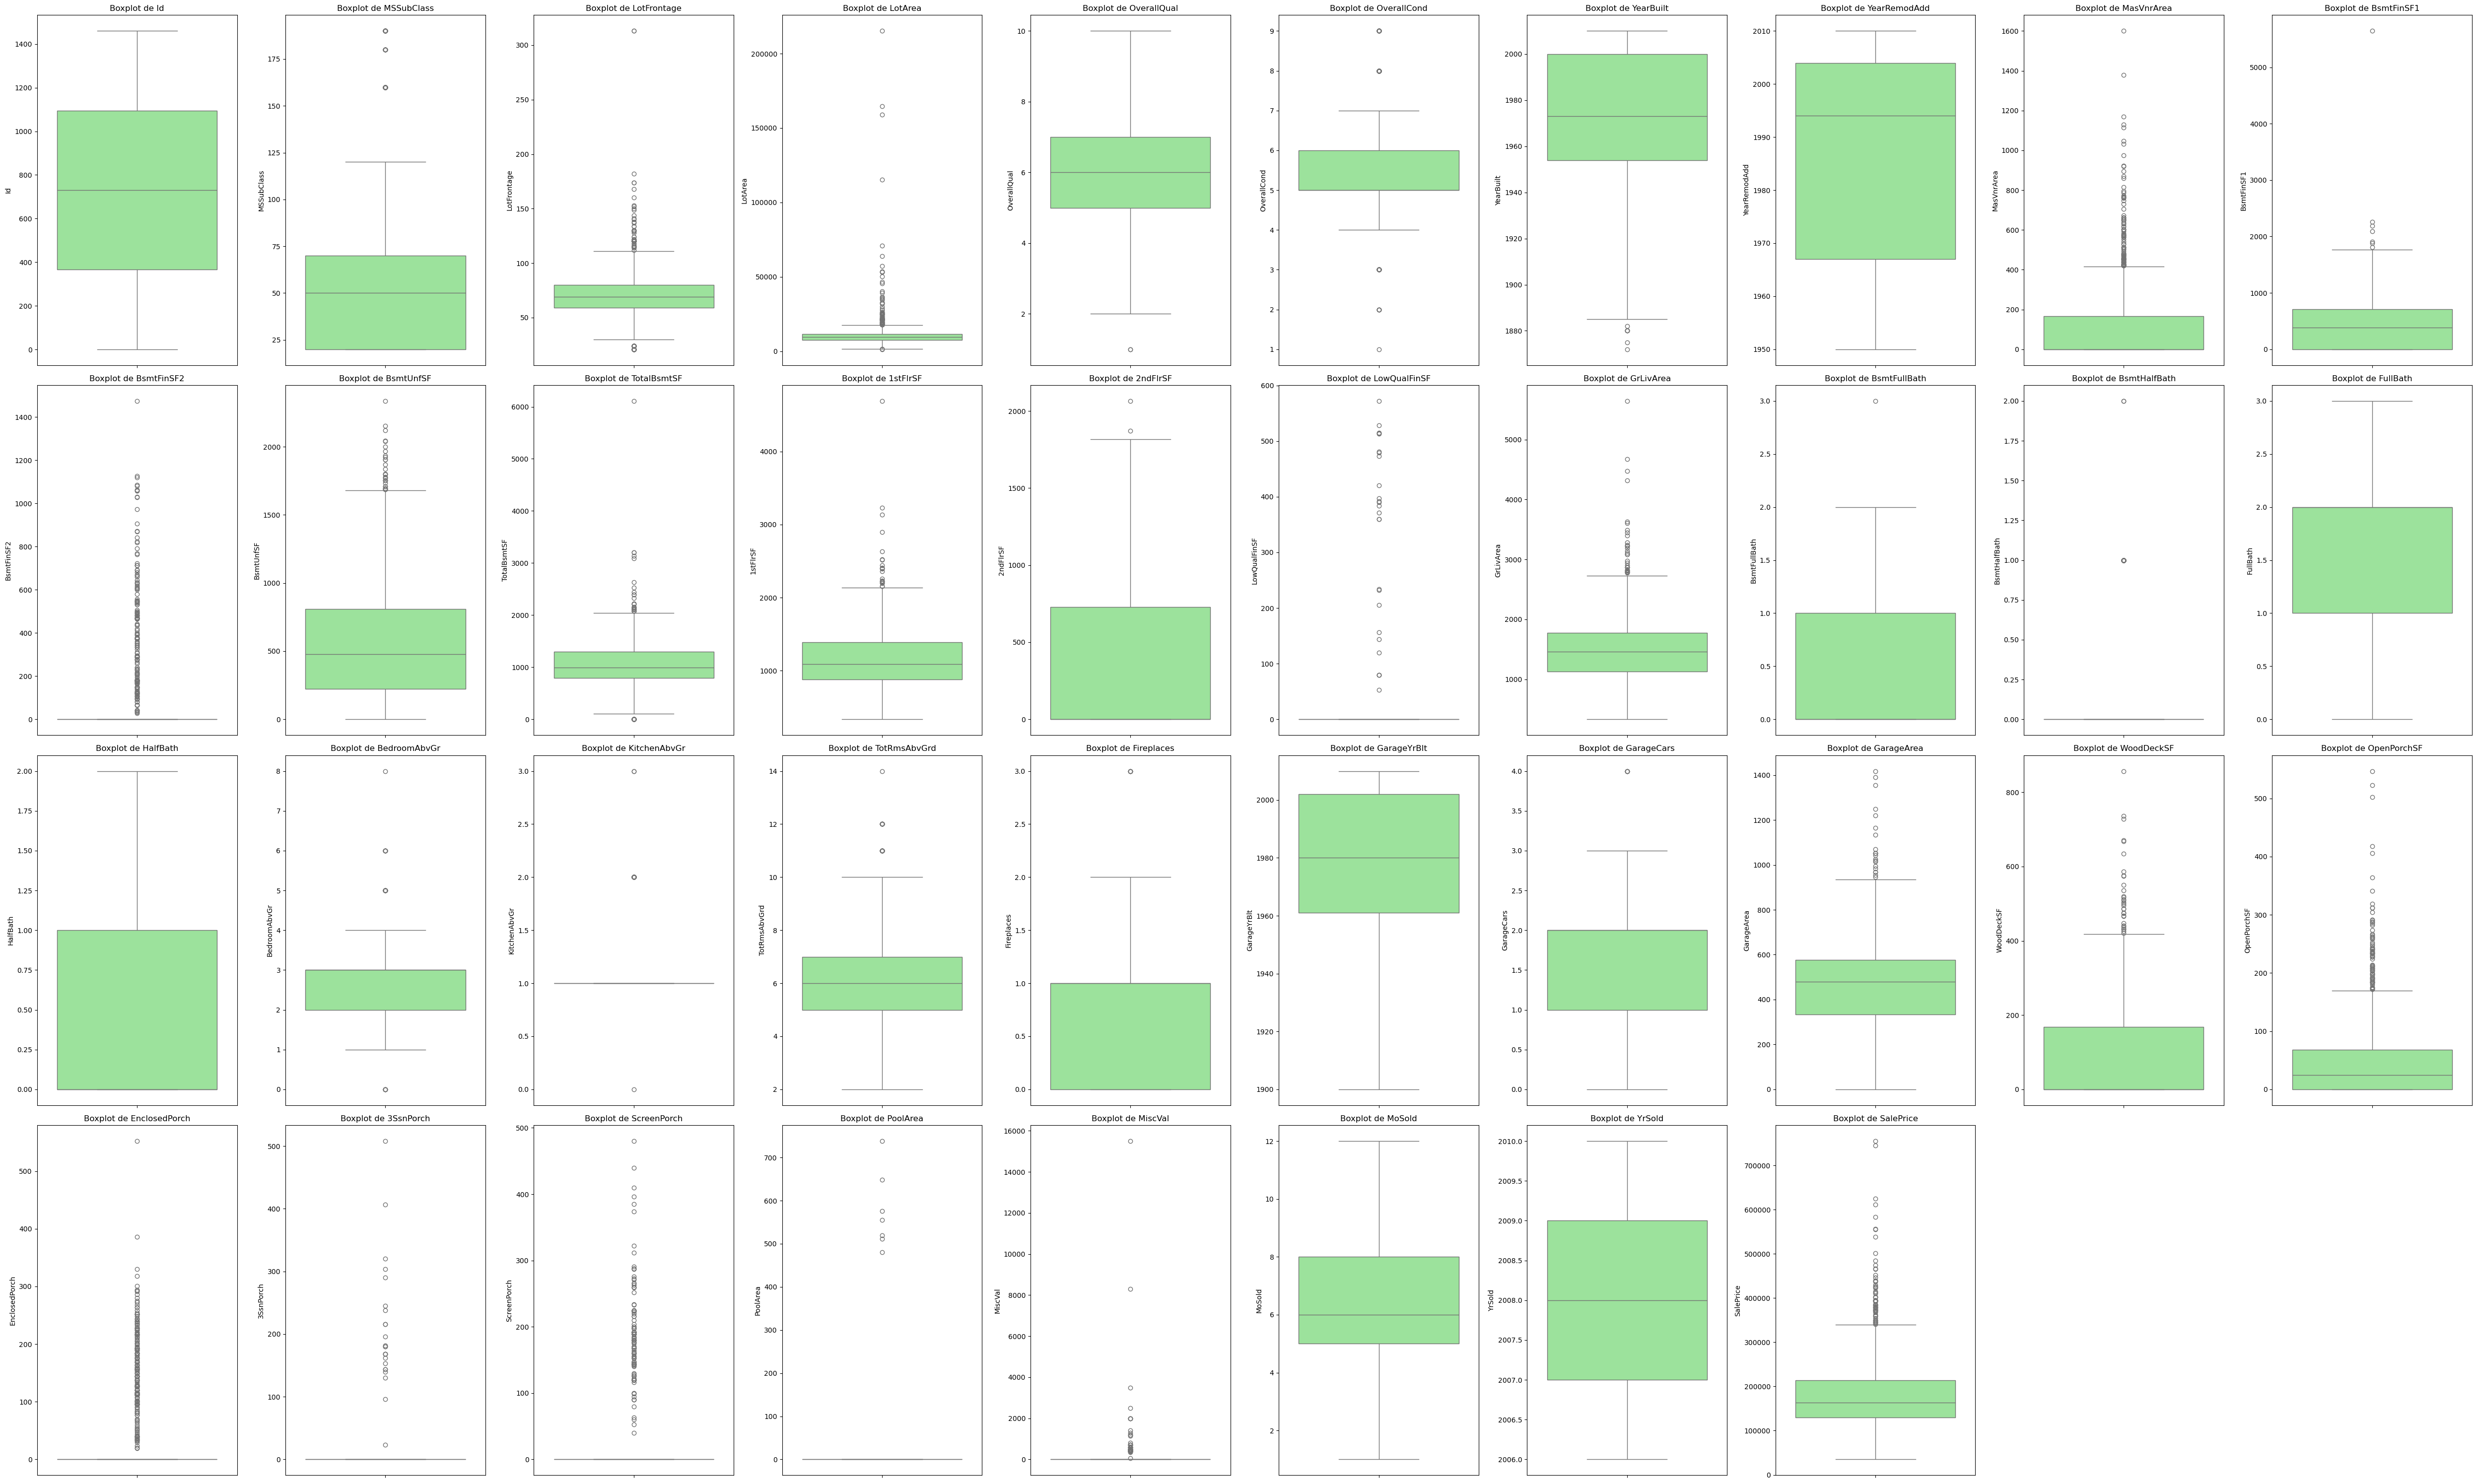

In [458]:
# extraer columnas numericas 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 10
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(50, 30))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logran outliers varias columnas. 

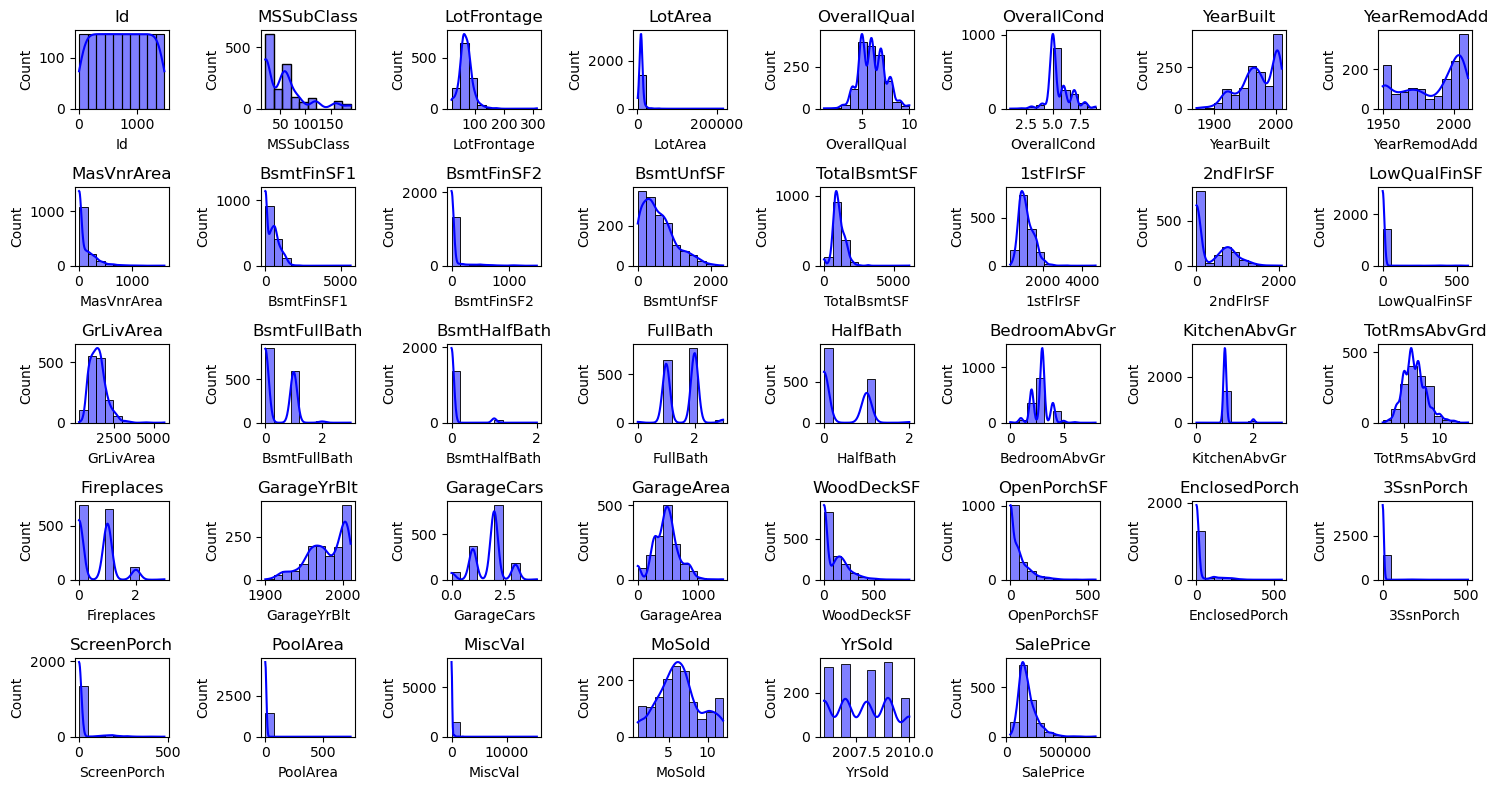

In [459]:
# distribucion de los datos
plt.figure(figsize=(15, 8))

# numero de columnas y filas
cols = 8
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i)  
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"{col}")
    plt.tight_layout()

plt.show()

Se observan distribuciones normales en el dataset. Una de ellas es el OverallQual el cual es una calificacion que se da a las terminaciones de las casas en escala de 1 al 10. 

In [460]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


A continuacion se grafica un mapa de calor para identificar correlaciones.

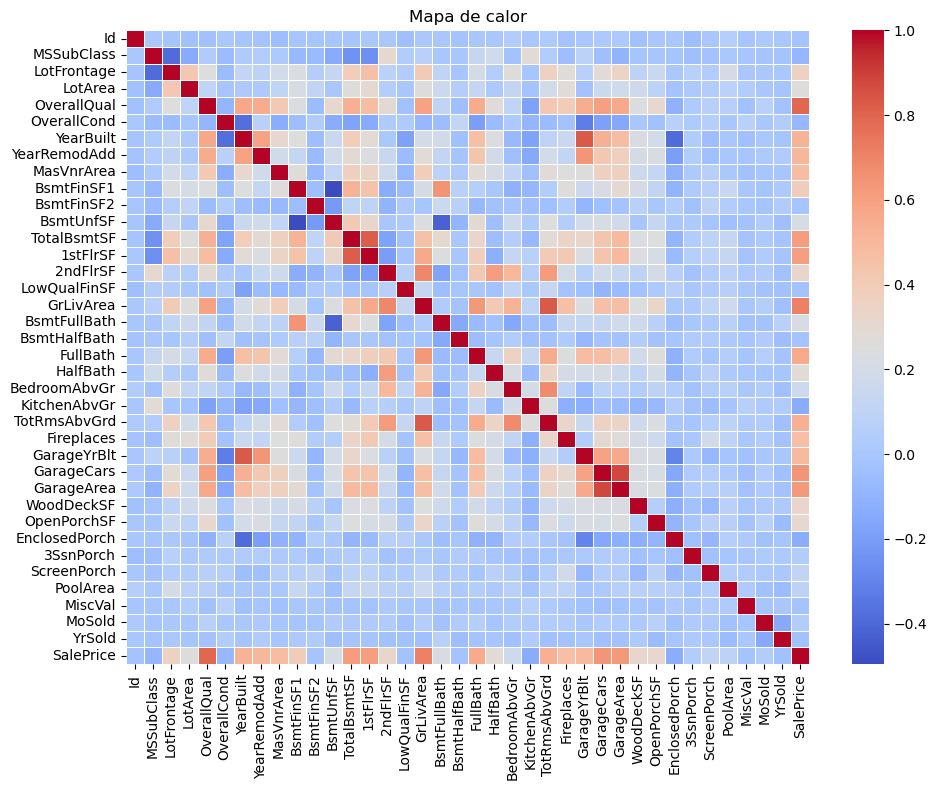

In [461]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor')
plt.tight_layout()
plt.show()

### **4. Implementacion del modelo**

Los datos ya venian divididos en dos archivos csv, uno de train y otro de test, y se utilizara de la misma forma con el modelo.

In [462]:
# los datos de train son del csv de train
df_train = df
df_train.shape

(1460, 81)

In [463]:
# los datos de test 
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [464]:
df_test.shape

(1459, 80)

Las variables predictoras son todas menos el saleprice, ya que este es el target

In [465]:
# variables predictoras
x = df_train.drop(columns=['SalePrice'])
y = df_train[['SalePrice']]

In [466]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [467]:
# separar en columnas categoricas y numericas
numerical_features = [col for col in x_train.select_dtypes(include=['int64', 'float64']).columns if col != 'SalePrice']

categorical_features = df_train.select_dtypes(include=['string[python]']).columns.tolist()

print(categorical_features)
print(numerical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

A continuacion se elige los transformadores para cada tipo de columna. En la estrategia de imputacion para los datos numericos se opto por imputar con la mediana en vez de la media ya que hay bastantes datos faltantes y la mayoria de los datos no tienen distribucion normal. En terminos de escalamiento, debido a la presencia de outliers se opto por el robust scaler. Para los datos categoricos se opto por el onehotencoder

In [468]:
# imputacion de valores faltantes y escalado
num_imputer = SimpleImputer(strategy='median')
num_scaler = RobustScaler()

In [469]:
# procesar las columnas numéricas
x_train_num = num_imputer.fit_transform(x_train[numerical_features])
x_train_num = num_scaler.fit_transform(x_train_num)

x_test_num = num_imputer.transform(x_test[numerical_features])
x_test_num = num_scaler.transform(x_test_num)

In [470]:
# imputar valores nulos en columnas categóricas
x_train[categorical_features] = x_train[categorical_features].fillna("Missing")
x_test[categorical_features] = x_test[categorical_features].fillna("Missing")

print(x_train[categorical_features].isnull().sum())
print(x_test[categorical_features].isnull().sum())

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0

In [471]:
# procesar columnas categoricas
cat_encoder = OneHotEncoder(handle_unknown='ignore')

x_train_cat = cat_encoder.fit_transform(x_train[categorical_features]).toarray()
x_test_cat = cat_encoder.transform(x_test[categorical_features]).toarray()

# combinar columnas preprocesadas
x_train_processed = np.hstack([x_train_num, x_train_cat])
x_test_processed = np.hstack([x_test_num, x_test_cat])

### **Modelo de regresion**

In [472]:
# ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_processed, y_train)

LinearRegression()

In [473]:
# realizar predicciones
y_pred = model.predict(x_test_processed)

# imprimir las predicciones 
print("Predicciones:", y_pred[:5])

Predicciones: [[262611.52587175]
 [149430.79987159]
 [110071.76620319]
 [209516.95601935]
 [ 91762.97560005]]


In [474]:
# evaluacion en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² (R-squared): {r2:.2f}")

MAE (Mean Absolute Error): 23028.41
MSE (Mean Squared Error): 3460242114.38
R² (R-squared): 0.50


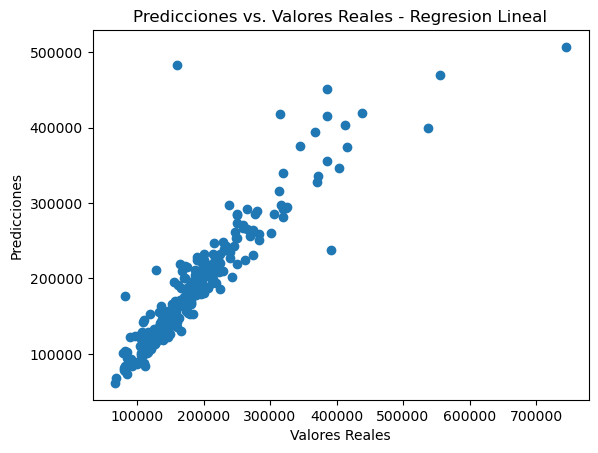

In [483]:
# gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales - Regresion Lineal')
plt.show()

### **Modelo LightGBM (LGBM)**

In [476]:
# ajustar el modelo LightGBM
model = lgb.LGBMRegressor()

In [477]:
# ajustar el modelo a los datos de entrenamiento
model.fit(x_train_processed, y_train)

c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3450
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 192
[LightGBM] [Info] Start training from score 180808.898973


LGBMRegressor()

In [478]:
# realizar predicciones
y_pred = model.predict(x_test_processed)

In [479]:
# imprimir las predicciones
print("Predicciones:", y_pred[:5])

Predicciones: [222597.89660349 154953.46293356 107759.93851875 204635.84951529
  90501.5152484 ]


In [480]:
# Evaluación en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² (R-squared): {r2:.2f}")

MAE (Mean Absolute Error): 17420.87
MSE (Mean Squared Error): 1137635871.40
R² (R-squared): 0.84


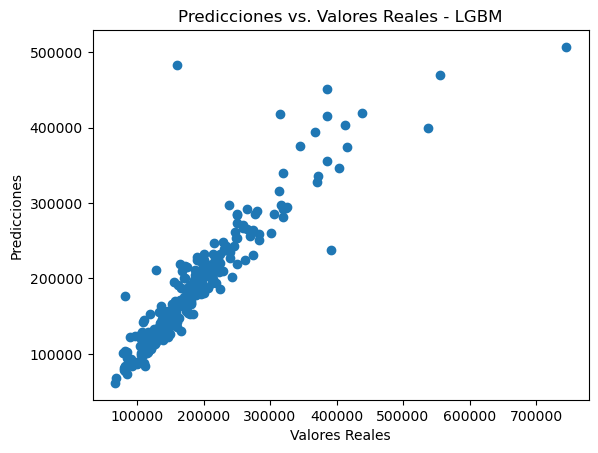

In [482]:
# gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales - LGBM')
plt.show()

### **Conclusiones**

Se han aplicado dos modelos para predecir el precio de venta de casas basadas en diversas caracteristicas: regresion lineal y lgbm. 

Las métricas de evaluación obtenidas para la regresión lineal fueron las siguientes: 
MAE (Mean Absolute Error): 23028.41
MSE (Mean Squared Error): 3460242114.38
R² (R-squared): 0.50
Mientras que las obtenidas por LGBM fueron: 
MAE (Mean Absolute Error): 17420.87
MSE (Mean Squared Error): 1137635871.40
R² (R-squared): 0.84

Se observa una diferencia relevante entre la performance de ambos modelos, siendo el de mejor resultados el LGBM, ya que las métricas fueron superiores para este modelo. En particular, MAE y MSE arrojan valores menores y por tanto favoreciendo a mejores predicciones, en tanto que R2 se encuentra cercano a 1, asi tambien favoreciendo a las mejores predicciones. Probablemente esta diferencia se deba a que la relación entre las variables estudiadas es compleja y no es muy bien captado por la regresión lineal, ya que dicho modelo funciona mejor con relaciones del tipo lineales.
